In [271]:
using PyPlot;
using HDF5;
include("omp.jl");

function omp_sparse(A::Toeplitz, y, k)
    inds = Vector{Int}()
    r = copy(y)
    A_ct = ctrans(A)
    for j = 1:k
        global xapprox
        rX = squeeze(abs(A_ct * r''), 2)
        sortedinds = sortperm(rX, rev=true)
        for ind_ in sortedinds
            if !(ind_ in inds)
                push!(inds, ind_)
                break
            end
        end
        Aapprox = sparse(A[:, inds])
        # Somehow I was writing the wrong number on top!
        xapprox = inv(full(Aapprox' * Aapprox)) * (Aapprox' * y)
        r[:] = y - Aapprox * xapprox
    end
    x = zeros(size(A)[2])
    x[inds] = xapprox
    return x
end

omp_sparse (generic function with 1 method)

In [335]:
using DSP

INFO: Recompiling stale cache file /Users/ryandwyer/.julia/lib/v0.5/DSP.ji for module DSP.
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in symbol(::String, ::Vararg{String,N}) at ./deprecated.jl:30
 in @julia_newer_than(::Any, ::Any, ::Any) at /Users/ryandwyer/.julia/v0.5/DSP/src/util.jl:29
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in macro expansion; at ./none:2 [inlined]
 in anonymous at ./<missing>:?
 in eval(::Module, ::Any) at ./boot.jl:234
 in eval(::Module, ::Any) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in process_options(::Base.JLOptions) at ./client.jl:239
 in _start() at ./client.jl:318
 in _start() at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
while loading /Users/ryandwyer/.julia/v0.5/DSP/src/util.jl, in expression

In [272]:
fh = h5open("DC-data.h5", "r")

HDF5 data file: DC-data.h5

In [273]:
t = fh["20/t"][:];
x = fh["20/x"][:];

In [274]:
tau = 1/(2*pi)

0.15915494309189535

In [275]:
length(0:0.001:1)

1001

In [339]:
function f_LP(t)
    if t >= 0
        return exp(-t/tau)
    else
        return 0.0
    end
end

f_LP (generic function with 1 method)

In [343]:
_t1 = collect(-0.1:0.001:1.001)
r1 = f_LP.(_t1)

1102-element Array{Float64,1}:
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 ⋮         
 0.00198854
 0.00197609
 0.00196371
 0.00195141
 0.00193919
 0.00192704
 0.00191497
 0.00190298
 0.00189106
 0.00187921
 0.00186744
 0.00185575

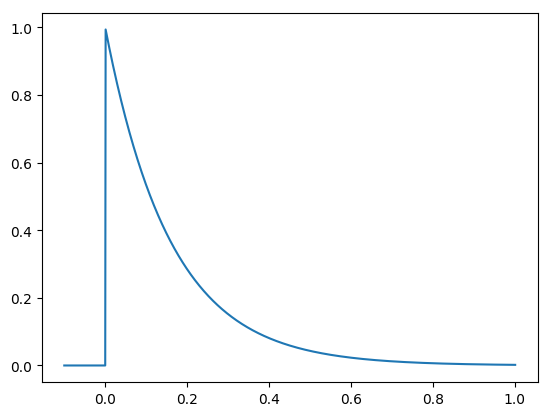

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x34f9ca990>

In [344]:
plot(_t1, r1)

In [276]:
resp = exp(- ./ tau)
normalize!(resp, 1)

1002-element Array{Float64,1}:
 0.00627506
 0.00623576
 0.0061967 
 0.00615789
 0.00611932
 0.00608099
 0.0060429 
 0.00600505
 0.00596744
 0.00593006
 0.00589292
 0.00585601
 0.00581933
 ⋮         
 1.24782e-5
 1.24001e-5
 1.23224e-5
 1.22452e-5
 1.21685e-5
 1.20923e-5
 1.20166e-5
 1.19413e-5
 1.18665e-5
 1.17922e-5
 1.17183e-5
 1.16449e-5

In [277]:
xn = x - mean(x)

60000-element Array{Float64,1}:
 0.00340015
 0.00328472
 0.00316522
 0.00304183
 0.00291477
 0.00278424
 0.00265047
 0.00251368
 0.00237413
 0.0022321 
 0.00208787
 0.00194173
 0.00179393
 ⋮         
 0.00682119
 0.00661321
 0.00641102
 0.00621457
 0.00602377
 0.0058385 
 0.00565862
 0.00548394
 0.00531429
 0.00514943
 0.00498916
 0.00483322

In [278]:
A = toeplitz(reverse(resp), length(xn), length(xn) + length(resp) - 1)

60000-element Array{Float64,1}:
 1.16449e-5
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 ⋮         
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       

61001-element Array{Float64,1}:
 1.16449e-5
 1.17183e-5
 1.17922e-5
 1.18665e-5
 1.19413e-5
 1.20166e-5
 1.20923e-5
 1.21685e-5
 1.22452e-5
 1.23224e-5
 1.24001e-5
 1.24782e-5
 1.25569e-5
 ⋮         
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       

60000×61001 ToeplitzMatrices.Toeplitz{Float64,Complex{Float64}}:
 1.16449e-5  1.17183e-5  1.17922e-5  …  0.0         0.0         0.0       
 0.0         1.16449e-5  1.17183e-5     0.0         0.0         0.0       
 0.0         0.0         1.16449e-5     0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0         …  0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0         …  0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0       

In [279]:
Act = ctrans(A)

61001×60000 ToeplitzMatrices.Toeplitz{Float64,Complex{Float64}}:
 1.16449e-5  0.0         0.0         …  0.0         0.0         0.0       
 1.17183e-5  1.16449e-5  0.0            0.0         0.0         0.0       
 1.17922e-5  1.17183e-5  1.16449e-5     0.0         0.0         0.0       
 1.18665e-5  1.17922e-5  1.17183e-5     0.0         0.0         0.0       
 1.19413e-5  1.18665e-5  1.17922e-5     0.0         0.0         0.0       
 1.20166e-5  1.19413e-5  1.18665e-5  …  0.0         0.0         0.0       
 1.20923e-5  1.20166e-5  1.19413e-5     0.0         0.0         0.0       
 1.21685e-5  1.20923e-5  1.20166e-5     0.0         0.0         0.0       
 1.22452e-5  1.21685e-5  1.20923e-5     0.0         0.0         0.0       
 1.23224e-5  1.22452e-5  1.21685e-5     0.0         0.0         0.0       
 1.24001e-5  1.23224e-5  1.22452e-5  …  0.0         0.0         0.0       
 1.24782e-5  1.24001e-5  1.23224e-5     0.0         0.0         0.0       
 1.25569e-5  1.24782e-5  1.24001e-5

In [280]:
ind = sortperm(Act * x, rev=true)

61001-element Array{Int64,1}:
  4881
  4880
  4882
  4879
  4883
  4878
  4884
  4877
  4885
  4876
  4886
  4875
  4887
     ⋮
 57999
 58010
 58000
 58009
 58001
 58008
 58002
 58007
 58003
 58006
 58004
 58005

In [281]:
sparsevec()

LoadError: LoadError: MethodError: no method matching sparsevec()
Closest candidates are:
  sparsevec(!Matched::AbstractSparseArray{Tv,Ti,N}) at sparse/sparsevector.jl:259
  sparsevec{Ti<:Integer}(!Matched::AbstractArray{Ti<:Integer,1}, !Matched::Union{AbstractArray{Bool,1},Bool}) at sparse/sparsevector.jl:129
  sparsevec{Tv,Ti<:Integer}(!Matched::AbstractArray{Ti<:Integer,1}, !Matched::AbstractArray{Tv,1}, !Matched::Function) at sparse/sparsevector.jl:100
  ...
while loading In[281], in expression starting on line 1

In [282]:
Aapprox_dense = A[:, [4042, ind[492], ind[1354]]]

60000×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [283]:
Aapprox_sparse = sparse(Aapprox_dense)

60000×3 sparse matrix with 3006 Float64 nonzero entries:
	[3041 ,     1]  =  0.00627506
	[3042 ,     1]  =  0.00623576
	[3043 ,     1]  =  0.0061967
	[3044 ,     1]  =  0.00615789
	[3045 ,     1]  =  0.00611932
	[3046 ,     1]  =  0.00608099
	[3047 ,     1]  =  0.0060429
	[3048 ,     1]  =  0.00600505
	[3049 ,     1]  =  0.00596744
	[3050 ,     1]  =  0.00593006
	⋮
	[55560,     3]  =  1.24001e-5
	[55561,     3]  =  1.23224e-5
	[55562,     3]  =  1.22452e-5
	[55563,     3]  =  1.21685e-5
	[55564,     3]  =  1.20923e-5
	[55565,     3]  =  1.20166e-5
	[55566,     3]  =  1.19413e-5
	[55567,     3]  =  1.18665e-5
	[55568,     3]  =  1.17922e-5
	[55569,     3]  =  1.17183e-5
	[55570,     3]  =  1.16449e-5

In [284]:
using BenchmarkTools

In [285]:
@benchmark Aapprox_dense' * Aapprox_dense

BenchmarkTools.Trial: 
  samples:          10000
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%
  memory estimate:  192.00 bytes
  allocs estimate:  2
  minimum time:     382.55 μs (0.00% GC)
  median time:      408.98 μs (0.00% GC)
  mean time:        426.43 μs (0.00% GC)
  maximum time:     912.50 μs (0.00% GC)

In [286]:
@benchmark inv(Aapprox_dense' * Aapprox_dense)  * (Aapprox_dense' * x)

BenchmarkTools.Trial: 
  samples:          7288
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%
  memory estimate:  2.77 kb
  allocs estimate:  17
  minimum time:     479.16 μs (0.00% GC)
  median time:      517.73 μs (0.00% GC)
  mean time:        684.34 μs (0.00% GC)
  maximum time:     928.36 ms (0.00% GC)

In [287]:
y - Aapprox_sparse * xapprox

LoadError: LoadError: DimensionMismatch("")
while loading In[287], in expression starting on line 1

In [288]:
x_approx = inv(full(Aapprox_sparse' * Aapprox_sparse))  * (Aapprox_sparse' * x)

3-element Array{Float64,1}:
 -11.0929
  68.1188
  18.0225

In [289]:
x - Aapprox_sparse * x_approx

60000-element Array{Float64,1}:
 -0.0348287
 -0.0349441
 -0.0350636
 -0.035187 
 -0.035314 
 -0.0354446
 -0.0355783
 -0.0357151
 -0.0358547
 -0.0359967
 -0.0361409
 -0.0362871
 -0.0364349
  ⋮        
 -0.0314076
 -0.0316156
 -0.0318178
 -0.0320142
 -0.032205 
 -0.0323903
 -0.0325702
 -0.0327449
 -0.0329145
 -0.0330794
 -0.0332397
 -0.0333956

In [290]:
sx = sparsevec(zeros(61001))

Sparse vector of length 61001 with 0 Float64 nonzero entries:


In [291]:
y = xn
k = 1
inds = Vector{Int}()
r = copy(y)
A_ct = ctrans(A)

61001×60000 ToeplitzMatrices.Toeplitz{Float64,Complex{Float64}}:
 1.16449e-5  0.0         0.0         …  0.0         0.0         0.0       
 1.17183e-5  1.16449e-5  0.0            0.0         0.0         0.0       
 1.17922e-5  1.17183e-5  1.16449e-5     0.0         0.0         0.0       
 1.18665e-5  1.17922e-5  1.17183e-5     0.0         0.0         0.0       
 1.19413e-5  1.18665e-5  1.17922e-5     0.0         0.0         0.0       
 1.20166e-5  1.19413e-5  1.18665e-5  …  0.0         0.0         0.0       
 1.20923e-5  1.20166e-5  1.19413e-5     0.0         0.0         0.0       
 1.21685e-5  1.20923e-5  1.20166e-5     0.0         0.0         0.0       
 1.22452e-5  1.21685e-5  1.20923e-5     0.0         0.0         0.0       
 1.23224e-5  1.22452e-5  1.21685e-5     0.0         0.0         0.0       
 1.24001e-5  1.23224e-5  1.22452e-5  …  0.0         0.0         0.0       
 1.24782e-5  1.24001e-5  1.23224e-5     0.0         0.0         0.0       
 1.25569e-5  1.24782e-5  1.24001e-5

In [292]:
A_ct * r

61001-element Array{Float64,1}:
 3.95945e-8 
 7.80943e-8 
 1.15445e-7 
 1.51595e-7 
 1.86493e-7 
 2.2009e-7  
 2.52342e-7 
 2.83204e-7 
 3.12636e-7 
 3.40599e-7 
 3.67059e-7 
 3.91984e-7 
 4.15344e-7 
 ⋮          
 0.000421482
 0.000381065
 0.000341707
 0.000303378
 0.000266047
 0.000229686
 0.000194266
 0.000159759
 0.000126137
 9.33742e-5 
 6.14461e-5 
 3.03287e-5 

In [293]:
methods(SparseVector)

# 2 methods for generic function "(::Type)":
(::Type{SparseVector}){Tv,Ti}(n::Integer, nzind::Array{Ti,1}, nzval::Array{Tv,1}) at sparse/sparsevector.jl:24
(::Type{T}){T}(arg) at sysimg.jl:53

In [294]:
size(A)

(60000,61001)

In [295]:
x = sparsevec(Vector{Int}(),Vector{Float64}(), size(A)[2])

Sparse vector of length 61001 with 0 Float64 nonzero entries:


In [296]:
x[3] = 2.0

2.0

In [297]:
?sortperm!

search: sortperm! sortperm



```
sortperm!(ix, v, [alg=<algorithm>,] [by=<transform>,] [lt=<comparison>,] [rev=false,] [initialized=false])
```

Like `sortperm`, but accepts a preallocated index vector `ix`.  If `initialized` is `false` (the default), ix is initialized to contain the values `1:length(v)`.

See also [`sortperm`](:func:`sortperm`).


In [298]:
y = xn
k = 50
x = sparsevec(Vector{Int}(),Vector{Float64}(), size(A)[2])
r = copy(y)
A_ct = ctrans(A)
for j = 1:k
    rX = abs(A_ct * r)
    sortedinds = sortperm(rX, rev=true)
    for ind_ in sortedinds
        if !(ind_ in x.nzind)
            println(ind_)
            x[ind_] = 1.0
            break
        end
    end
    Aapprox = sparse(A[:, x.nzind])
    # Somehow I was writing the wrong number on top!
    x.nzval[:] = inv(full(Aapprox' * Aapprox)) * (Aapprox' * y)
    r[:] = y - Aapprox * x.nzval
end

58005
4881
55118
58379
55333
58611
57974
55027
58034
4916
4848
55581
55215
58877
58293
58493
55827
56323
55443
58730
56824
57991
4897
4866
57316
58018
55071
59162
56064
5180
11825
56560
28319
55697
47199
48312
58115
55166
47606
57649
55273
28794
20790
27907
58433
57043
30800
48922
58335
5578


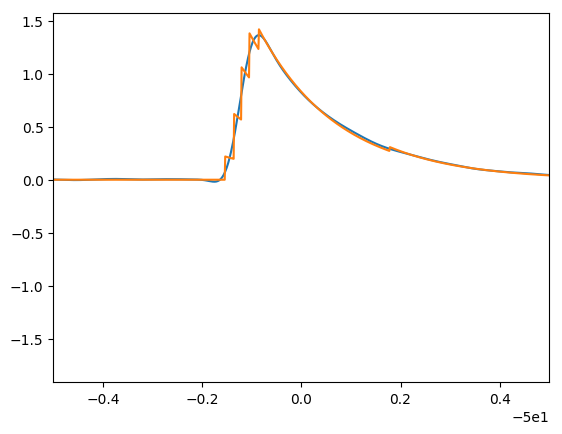

(-50.5,-49.5)

In [334]:
plot(t, xn)
plot(t, A * full(x))
xlim(-50.5, -49.5)

In [332]:
t

60000-element Array{Float64,1}:
 -53.9995
 -53.9985
 -53.9975
 -53.9965
 -53.9955
 -53.9945
 -53.9935
 -53.9925
 -53.9915
 -53.9905
 -53.9895
 -53.9885
 -53.9875
   ⋮     
   5.9885
   5.9895
   5.9905
   5.9915
   5.9925
   5.9935
   5.9945
   5.9955
   5.9965
   5.9975
   5.9985
   5.9995

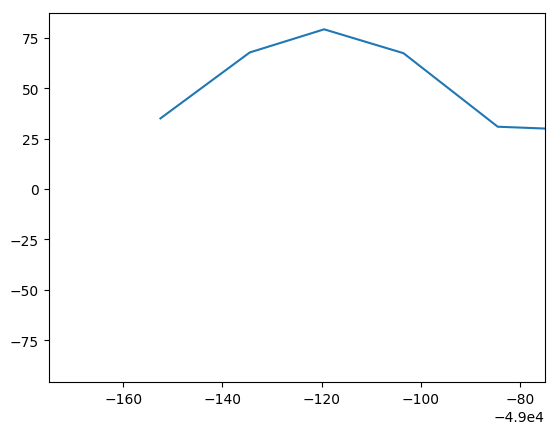

(-49175,-49075)

In [330]:
plot(t[x.nzind]*1e3, x.nzval, )
xlim(-49175, -49075)

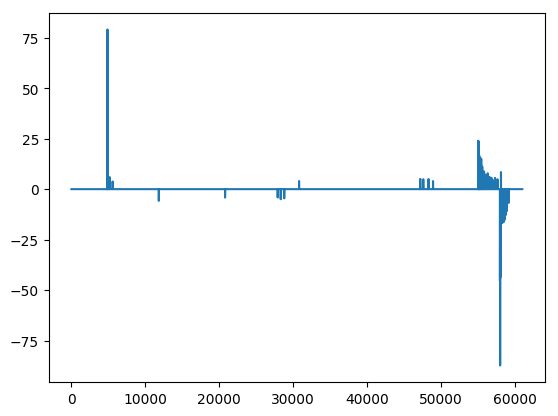

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33e145750>

In [198]:
plot(x)

In [181]:
A

60000×61001 ToeplitzMatrices.Toeplitz{Float64,Complex{Float64}}:
 0.00627506  0.00623576  0.0061967   …  0.0         0.0         0.0       
 0.0         0.00627506  0.00623576     0.0         0.0         0.0       
 0.0         0.0         0.00627506     0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0         …  0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0         …  0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.0         0.0         0.0       

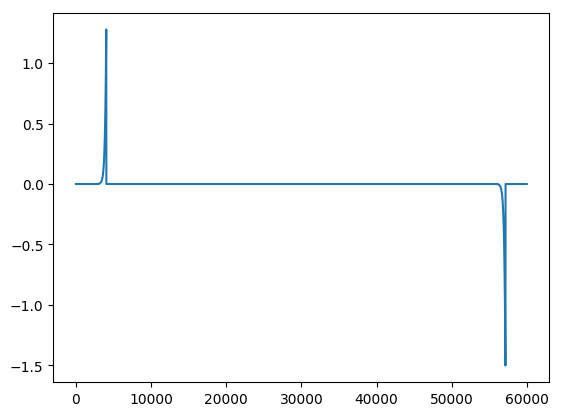

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x342a624d0>

In [180]:
plot(A * full(x))

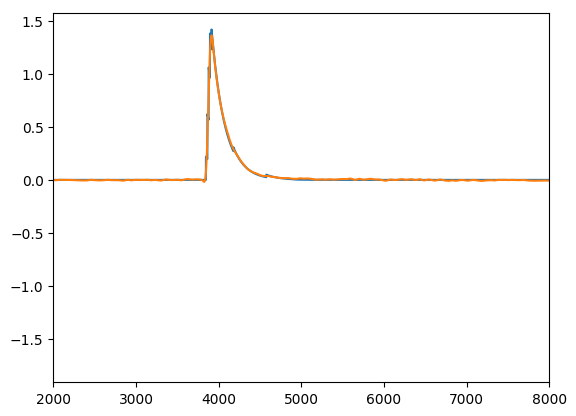

(2000,8000)

In [311]:
plot(xn-r)
plot(xn)
xlim(2000, 8000)

In [526]:
function sparse_sum(x)
    vals = cumsum(x.nzval)
    inds = x.nzind
    return inds, vals
end

sparse_sum (generic function with 1 method)

In [528]:
xi, xsum = sparse_sum(x)

([5248,5461,12194,21150,28687,29160,47567,47972,48677,55384  …  57983,58372,58481,58661,58764,58888,59026,59132,59268,59538],[279.013,287.173,280.6,275.891,269.974,264.896,270.559,276.023,281.707,317.279  …  496.751,157.653,170.128,140.624,111.287,88.0086,73.1263,62.8194,52.3658,45.487])

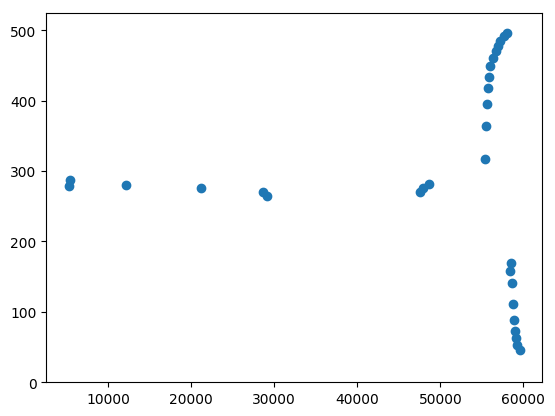

(0,525)

In [531]:
plot(xi, xsum, "o")
ylim(0, 525)

In [163]:
x.nzval[:] = 

2-element Array{Float64,1}:
  203.751
 -239.242

In [103]:
xr = omp_sparse(A, xn, 2)

LoadError: LoadError: InterruptException:
while loading In[103], in expression starting on line 1

In [310]:
plot(t, x)
plot(t, xr[501:end-501]/150)

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension, but have shapes (60000,) and (61001,)',)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3158, in plot
    ret = ax.plot(*args, **kwargs)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py", line 1857, in inner
    return func(ax, *args, **kwargs)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1383, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 403, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 381, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 240, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))

while loading In[310], in expression starting on line 1